In [1]:
#  Evaluation_Python_Notebook. 
#  This file demonstrates the model and the results that are generated for the same. 
#  Before runnning the file, you will have to download all the dependencies - ortools is the most important here.
#  To run this file, type Evaluation.py in cmd
#  After running, first you will see the synthetic graph that is created. After closing that, the model will 
#  start running and will give you the output in the form of another figure, in which you will see the paths that
#  connect all the nodes with their coordinates. After this, you will then see evaluation model beinf run.
#  This evaluation is done with the help of Google's OR-Tools. At the end, you will see the paths that
#  were evaluated using OR-Tools. You can see the paths created from our model as well.
#  This code is running both our model and Google's model on the same synthetic graph.
#  For graphs and figures that explain more about results, see Evaluation-Results.ipynb
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn
import haversine as hs
from haversine import Unit

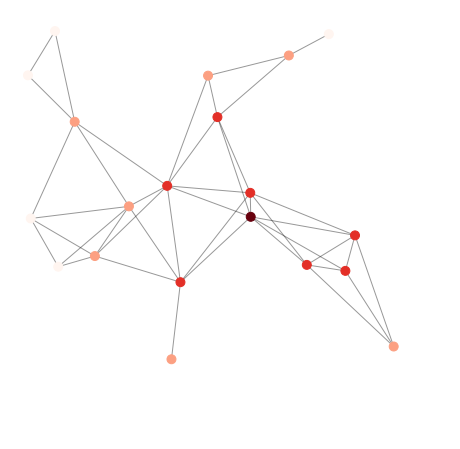

In [8]:
#Generation_of_Synthetic_Graph
#10: Number of nodes and 0.3: Density are defined first
## G: This is where the definition of the graph is stored
G = nx.random_geometric_graph(20, 0.3)
## pos: Details and attributes of G are stored here.
pos = nx.get_node_attributes(G, "pos")
## dmin: Least amount needed to break the loop.
dmin = 1
## ncenter: Updating the node center after each calculation.
ncenter = 0
## x,y: They signify the coordinates of a particular node.
for n in pos:
    ## x,y: They signify the coordinates of a particular node.
    x, y = pos[n]
    ## d: This stores the calculation of the equation which uses coordinates.
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
        
## p: This is a dictionary which stores node information.        
p = dict(nx.single_source_shortest_path_length(G, ncenter))
## figsize: This controls the endproduct of the figure.
plt.figure(figsize=(8, 8))
## nodelist, aplha: This stores the list of nodes along with their coordinates.
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    ## nodesize: This defines the size of the node.
    node_size=80,
    ## nodecolour: This defines the colour of the node.
    node_color=list(p.values()),
    ## cmap: This stores the final figure plot information
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [9]:
## ll: This signifies the x-coordinate of the particular node.
ll = list()
for i in pos:
    ll.append(pos[i][0])
## rr: This signifies the y-coordinate of the particular node.    
rr = list()
for i in pos:
    rr.append(pos[i][1])
## df: This declares an empty dataframe. 

In [10]:
ll[0]

0.7426003319843453

In [11]:
rr[0]

0.9811770550358175

In [12]:
pos[0]

[0.7426003319843453, 0.9811770550358175]

In [13]:
## df: This declares an empty dataframe.
df = pd.DataFrame()
df['Left'] = ll
df['Right'] = rr

In [14]:
df

,Left,Right
0,0.742600,0.981177
1,0.376920,0.353743
2,0.807078,0.472162
3,0.468034,0.771294
4,0.444896,0.876143
5,0.902403,0.191049
6,0.548942,0.579737
7,0.166067,0.419843
8,0.249999,0.545574
9,0.688291,0.397504


In [15]:
df['coordinate'] = list(zip(df['Left'],df['Right']))
df['ID'] = df.index

In [16]:
df

,Left,Right,coordinate,ID
0,0.742600,0.981177,"(0.7426003319843453, 0.9811770550358175)",0
1,0.376920,0.353743,"(0.37692032817735743, 0.3537429038390212)",1
2,0.807078,0.472162,"(0.8070779393260047, 0.4721619529736236)",2
3,0.468034,0.771294,"(0.46803437224910094, 0.7712935062145587)",3
4,0.444896,0.876143,"(0.4448958117279386, 0.8761433383656381)",4
5,0.902403,0.191049,"(0.9024028775435542, 0.1910490365291858)",5
6,0.548942,0.579737,"(0.548942044739374, 0.5797372304914188)",6
7,0.166067,0.419843,"(0.16606714299660308, 0.4198429434937935)",7
8,0.249999,0.545574,"(0.2499992787593821, 0.5455744249601142)",8
9,0.688291,0.397504,"(0.6882913978394667, 0.3975043011381859)",9


In [17]:
##@dist_from
#Calculates the distance between the provided node coordinates.
# loc1: This stores coordinates of the first node.
# loc2: This stores coordinates of the second node.
def dist_from(loc1,loc2):
    ## dist: This stores the calculated distance of two nodes.
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [18]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [19]:
df.head()

,Left,Right,coordinate,ID,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0.742600,0.981177,"(0.7426003319843453, 0.9811770550358175)",0,0.00,80.75,57.05,38.43,35.10,89.63,...,61.51,98.88,66.73,55.66,73.87,83.25,75.04,96.74,12.50,101.10
1,0.376920,0.353743,"(0.37692032817735743, 0.3537429038390212)",1,80.75,0.00,49.61,47.52,58.58,61.17,...,27.34,33.77,45.30,26.62,53.62,71.63,78.55,44.76,70.34,21.82
2,0.807078,0.472162,"(0.8070779393260047, 0.4721619529736236)",2,57.05,49.61,0.00,50.27,60.33,33.00,...,53.32,81.80,10.33,29.05,83.19,100.28,100.30,88.97,53.74,61.18
3,0.468034,0.771294,"(0.46803437224910094, 0.7712935062145587)",3,38.43,47.52,50.27,0.00,11.94,80.59,...,23.73,60.61,55.67,29.49,39.13,53.22,50.66,58.56,26.14,69.26
4,0.444896,0.876143,"(0.4448958117279386, 0.8761433383656381)",4,35.10,58.58,60.33,11.94,0.00,91.60,...,32.95,67.62,66.56,41.39,38.77,49.33,43.77,63.03,22.86,80.39


In [20]:
## distances_df: This stores the dataframe information of the sliced columns.    
distances_df=df.iloc[:,4:4183]
#distances_df.index=df.ID
distances_df.insert(0, 'ID', df.ID)

distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,80.75,57.05,38.43,35.10,89.63,49.56,89.47,73.12,...,61.51,98.88,66.73,55.66,73.87,83.25,75.04,96.74,12.50,101.10
1,1,80.75,0.00,49.61,47.52,58.58,61.17,31.58,24.57,25.58,...,27.34,33.77,45.30,26.62,53.62,71.63,78.55,44.76,70.34,21.82
2,2,57.05,49.61,0.00,50.27,60.33,33.00,31.10,71.51,62.48,...,53.32,81.80,10.33,29.05,83.19,100.28,100.30,88.97,53.74,61.18
3,3,38.43,47.52,50.27,0.00,11.94,80.59,23.12,51.52,34.90,...,23.73,60.61,55.67,29.49,39.13,53.22,50.66,58.56,26.14,69.26
4,4,35.10,58.58,60.33,11.94,0.00,91.60,34.93,59.46,42.67,...,32.95,67.62,66.56,41.39,38.77,49.33,43.77,63.03,22.86,80.39
5,5,89.63,61.17,33.00,80.59,91.60,0.00,58.42,85.74,82.56,...,76.77,94.62,25.06,53.53,107.87,125.93,128.39,105.76,86.74,61.00
6,6,49.56,31.58,31.10,23.12,34.93,58.42,0.00,46.14,33.46,...,22.85,56.57,34.07,6.75,52.09,69.29,70.23,60.57,40.05,51.55
7,7,89.47,24.57,71.51,51.52,59.46,85.74,46.14,0.00,16.81,...,27.97,10.48,68.76,44.10,38.17,54.03,64.21,20.50,77.50,35.82
8,8,73.12,25.58,62.48,34.90,42.67,82.56,33.46,16.81,0.00,...,11.96,25.76,62.02,33.50,28.05,46.08,53.30,27.12,60.99,44.56
9,9,65.18,34.96,15.60,48.24,59.71,33.07,25.51,58.12,51.44,...,44.25,68.12,10.70,20.47,75.27,93.16,95.32,76.76,59.10,45.61


In [21]:
## locations: This stores the nodes along with their coordinates in the form of a dictionary.
locations = dict( ( ID, (df.loc[ID, 'Left'], df.loc[ID, 'Right']) ) for ID in df.index)
locations

{0: (0.7426003319843453, 0.9811770550358175),
 1: (0.37692032817735743, 0.3537429038390212),
 2: (0.8070779393260047, 0.4721619529736236),
 3: (0.46803437224910094, 0.7712935062145587),
 4: (0.4448958117279386, 0.8761433383656381),
 5: (0.9024028775435542, 0.1910490365291858),
 6: (0.548942044739374, 0.5797372304914188),
 7: (0.16606714299660308, 0.4198429434937935),
 8: (0.2499992787593821, 0.5455744249601142),
 9: (0.6882913978394667, 0.3975043011381859),
 10: (0.3442350232312581, 0.5974121705241663),
 11: (0.0757222544526931, 0.3929038156102431),
 12: (0.7833286446535151, 0.3823688663835636),
 13: (0.5500897457199486, 0.5190836624421004),
 14: (0.11630652202810599, 0.7594897127377165),
 15: (0.0012217961198142113, 0.8769756777557902),
 16: (0.06778143978409201, 0.988907671439134),
 17: (0.008061604030118352, 0.5148980292753891),
 18: (0.644025048950183, 0.9271793351905949),
 19: (0.35477483665719056, 0.1587852575155949)}

In [22]:
distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,80.75,57.05,38.43,35.10,89.63,49.56,89.47,73.12,...,61.51,98.88,66.73,55.66,73.87,83.25,75.04,96.74,12.50,101.10
1,1,80.75,0.00,49.61,47.52,58.58,61.17,31.58,24.57,25.58,...,27.34,33.77,45.30,26.62,53.62,71.63,78.55,44.76,70.34,21.82
2,2,57.05,49.61,0.00,50.27,60.33,33.00,31.10,71.51,62.48,...,53.32,81.80,10.33,29.05,83.19,100.28,100.30,88.97,53.74,61.18
3,3,38.43,47.52,50.27,0.00,11.94,80.59,23.12,51.52,34.90,...,23.73,60.61,55.67,29.49,39.13,53.22,50.66,58.56,26.14,69.26
4,4,35.10,58.58,60.33,11.94,0.00,91.60,34.93,59.46,42.67,...,32.95,67.62,66.56,41.39,38.77,49.33,43.77,63.03,22.86,80.39
5,5,89.63,61.17,33.00,80.59,91.60,0.00,58.42,85.74,82.56,...,76.77,94.62,25.06,53.53,107.87,125.93,128.39,105.76,86.74,61.00
6,6,49.56,31.58,31.10,23.12,34.93,58.42,0.00,46.14,33.46,...,22.85,56.57,34.07,6.75,52.09,69.29,70.23,60.57,40.05,51.55
7,7,89.47,24.57,71.51,51.52,59.46,85.74,46.14,0.00,16.81,...,27.97,10.48,68.76,44.10,38.17,54.03,64.21,20.50,77.50,35.82
8,8,73.12,25.58,62.48,34.90,42.67,82.56,33.46,16.81,0.00,...,11.96,25.76,62.02,33.50,28.05,46.08,53.30,27.12,60.99,44.56
9,9,65.18,34.96,15.60,48.24,59.71,33.07,25.51,58.12,51.44,...,44.25,68.12,10.70,20.47,75.27,93.16,95.32,76.76,59.10,45.61


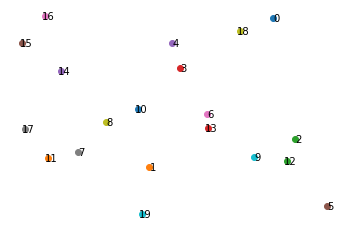

In [23]:
## l: It iterates over every instance of the locations dictionary
for l in locations:
    # lo: This stores an instance of the locations dictionary
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')    
plt.gca().axis('off');

In [24]:
## df1: This declares an empty dataframe.
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop(['Left'],axis=1)
df1 = df1.drop(['Right'],axis=1)
df1 = df1.drop(['coordinate'],axis=1)
df1 = df1.drop(['ID'],axis=1)

In [25]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,80.75,57.05,38.43,35.10,89.63,49.56,89.47,73.12,65.18,61.51,98.88,66.73,55.66,73.87,83.25,75.04,96.74,12.50,101.10
1,80.75,0.00,49.61,47.52,58.58,61.17,31.58,24.57,25.58,34.96,27.34,33.77,45.30,26.62,53.62,71.63,78.55,44.76,70.34,21.82
2,57.05,49.61,0.00,50.27,60.33,33.00,31.10,71.51,62.48,15.60,53.32,81.80,10.33,29.05,83.19,100.28,100.30,88.97,53.74,61.18
3,38.43,47.52,50.27,0.00,11.94,80.59,23.12,51.52,34.90,48.24,23.73,60.61,55.67,29.49,39.13,53.22,50.66,58.56,26.14,69.26
4,35.10,58.58,60.33,11.94,0.00,91.60,34.93,59.46,42.67,59.71,32.95,67.62,66.56,41.39,38.77,49.33,43.77,63.03,22.86,80.39
5,89.63,61.17,33.00,80.59,91.60,0.00,58.42,85.74,82.56,33.07,76.77,94.62,25.06,53.53,107.87,125.93,128.39,105.76,86.74,61.00
6,49.56,31.58,31.10,23.12,34.93,58.42,0.00,46.14,33.46,25.51,22.85,56.57,34.07,6.75,52.09,69.29,70.23,60.57,40.05,51.55
7,89.47,24.57,71.51,51.52,59.46,85.74,46.14,0.00,16.81,58.12,27.97,10.48,68.76,44.10,38.17,54.03,64.21,20.50,77.50,35.82
8,73.12,25.58,62.48,34.90,42.67,82.56,33.46,16.81,0.00,51.44,11.96,25.76,62.02,33.50,28.05,46.08,53.30,27.12,60.99,44.56
9,65.18,34.96,15.60,48.24,59.71,33.07,25.51,58.12,51.44,0.00,44.25,68.12,10.70,20.47,75.27,93.16,95.32,76.76,59.10,45.61


In [26]:
## distance: This stores values and date from df1.
distance = df1

In [27]:
type(df.ID[0])

numpy.int64

In [28]:
## distances: This is a dictionary that stores distances from each node with all other nodes.
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 80.75,
 (0, 2): 57.05,
 (0, 3): 38.43,
 (0, 4): 35.1,
 (0, 5): 89.63,
 (0, 6): 49.56,
 (0, 7): 89.47,
 (0, 8): 73.12,
 (0, 9): 65.18,
 (0, 10): 61.51,
 (0, 11): 98.88,
 (0, 12): 66.73,
 (0, 13): 55.66,
 (0, 14): 73.87,
 (0, 15): 83.25,
 (0, 16): 75.04,
 (0, 17): 96.74,
 (0, 18): 12.5,
 (0, 19): 101.1,
 (1, 0): 80.75,
 (1, 2): 49.61,
 (1, 3): 47.52,
 (1, 4): 58.58,
 (1, 5): 61.17,
 (1, 6): 31.58,
 (1, 7): 24.57,
 (1, 8): 25.58,
 (1, 9): 34.96,
 (1, 10): 27.34,
 (1, 11): 33.77,
 (1, 12): 45.3,
 (1, 13): 26.62,
 (1, 14): 53.62,
 (1, 15): 71.63,
 (1, 16): 78.55,
 (1, 17): 44.76,
 (1, 18): 70.34,
 (1, 19): 21.82,
 (2, 0): 57.05,
 (2, 1): 49.61,
 (2, 3): 50.27,
 (2, 4): 60.33,
 (2, 5): 33.0,
 (2, 6): 31.1,
 (2, 7): 71.51,
 (2, 8): 62.48,
 (2, 9): 15.6,
 (2, 10): 53.32,
 (2, 11): 81.8,
 (2, 12): 10.33,
 (2, 13): 29.05,
 (2, 14): 83.19,
 (2, 15): 100.28,
 (2, 16): 100.3,
 (2, 17): 88.97,
 (2, 18): 53.74,
 (2, 19): 61.18,
 (3, 0): 38.43,
 (3, 1): 47.52,
 (3, 2): 50.27,
 (3, 4): 11.94,


In [29]:
## V: This defines the total number of vehicles that will traverse the path.
V = 5

In [30]:
## prob: This initializes the problem that will run using provided constraints.
prob=LpProblem("vehicle", LpMinimize)

In [31]:
## indicator: This defines the variable dictionary consisting of distances and indicates if location i is connected to location j along route
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
## eliminator: This defines the variable dictionary consisting of the node ID's and elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [32]:
type(indicator)

dict

In [33]:
type(distances)

dict

In [34]:
## cost: This stores the result of distances calculations.
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [35]:
#constraints
for v in df.ID:
    cap = 1 if v != 10 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 10 and j!= 10) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [36]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 2min 40s
Optimal


In [37]:
## feasibleedges: This stores values of edges after the calculations are done.
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]
##@get_next_loc
# This provides with the next coordinates for the next node in the path.
def get_next_loc(initial):
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [38]:
## routes: This stores information regarding paths.    
routes = get_next_loc(10)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=10:
        r.append(get_next_loc(r[-1][1])[-1])

In [39]:
routes

[[(10, 1), (1, 19), (19, 13), (13, 6), (6, 10)],
 [(10, 2), (2, 12), (12, 5), (5, 9), (9, 10)],
 [(10, 4), (4, 0), (0, 18), (18, 3), (3, 10)],
 [(10, 8), (8, 17), (17, 11), (11, 7), (7, 10)],
 [(10, 14), (14, 15), (15, 16), (16, 10)]]

In [40]:
routes1 = routes

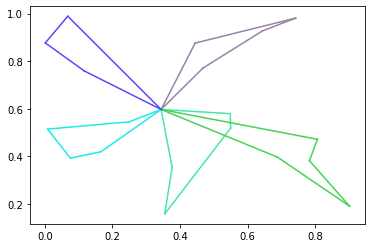

In [41]:
## coloured_loc: This stores information according to individual paths.        
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

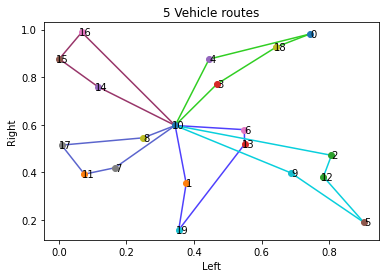

In [42]:
## coloured_loc: This stores information according to individual paths.        
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [43]:
routes

[[(10, 1), (1, 19), (19, 13), (13, 6), (6, 10)],
 [(10, 2), (2, 12), (12, 5), (5, 9), (9, 10)],
 [(10, 4), (4, 0), (0, 18), (18, 3), (3, 10)],
 [(10, 8), (8, 17), (17, 11), (11, 7), (7, 10)],
 [(10, 14), (14, 15), (15, 16), (16, 10)]]

In [44]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [45]:
##@ package create_data_model
# Stores the data for the problem.
def create_data_model():
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 5
    data['depot'] = 10
    return data

In [46]:
##@print_solution
#Prints solution on console.
def print_solution(data, manager, routing, solution):
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [47]:
##@main
#Solve the CVRP problem.
def main():
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    ##Returns the distance between the two nodes.
    def distance_callback(from_index, to_index):
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

Route for vehicle 0:
 10 ->  6 ->  2 ->  12 ->  9 ->  13 -> 10

Route for vehicle 1:
 10 ->  1 ->  19 ->  7 ->  11 ->  17 ->  8 -> 10

Route for vehicle 2:
 10 ->  3 ->  0 ->  18 ->  4 -> 10

Route for vehicle 3:
 10 ->  14 ->  15 ->  16 -> 10

Route for vehicle 4:
 10 ->  5 -> 10



In [48]:
routes

[[(10, 1), (1, 19), (19, 13), (13, 6), (6, 10)],
 [(10, 2), (2, 12), (12, 5), (5, 9), (9, 10)],
 [(10, 4), (4, 0), (0, 18), (18, 3), (3, 10)],
 [(10, 8), (8, 17), (17, 11), (11, 7), (7, 10)],
 [(10, 14), (14, 15), (15, 16), (16, 10)]]